

### Для выполнения домашнего задания необходимо взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество). 

In [21]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from jupyterthemes import jtplot
jtplot.style()
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [22]:
load_boston

<function sklearn.datasets.base.load_boston(return_X_y=False)>

In [23]:
 X_full, y_full = load_boston().data, load_boston().target

In [24]:
 X_full.shape

(506, 13)

In [25]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [26]:
load_boston().feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [27]:
X= pd.DataFrame(load_boston()['data'],columns = load_boston()['feature_names'])

In [28]:
y=pd.DataFrame(load_boston()['target'],columns = ['price'])

In [29]:
len(y)

506

In [30]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A9450C8898>]],
      dtype=object)

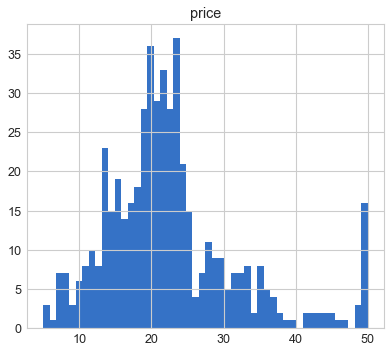

In [31]:
#Распредление целевой переменной
y.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A9451358D0>]],
      dtype=object)

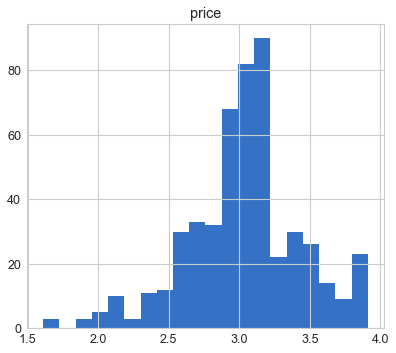

In [33]:
#логирифмирование не особо помает
np.log(y).hist(bins=20)

In [34]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
#Стандартизируем фичи
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_norm=scaler.transform(X)
X_norm= pd.DataFrame(X_norm,columns = X.columns)

In [36]:
X_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X_norm, y, test_size=0.2,random_state=42)

In [38]:
type(y_train)

pandas.core.frame.DataFrame

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

Так как задача регрссии будем меряться  R^2ми

## LinearRegression

In [43]:
%%time
lr_params = {
    'fit_intercept':[False, True]
}

fit_intercepts = [False, True]
param_regr = dict(fit_intercept=fit_intercepts)
lr = LinearRegression()
grid_lr = GridSearchCV(lr, param_regr,
                       scoring='r2',
                       cv=10,n_jobs=-1)
grid_lr.fit(X_train, y_train)

print(grid_lr.best_params_)
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)

{'fit_intercept': True}
0.6982468192455168
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Wall time: 4.37 s


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
#Оценим тчоностьна тесте
grid_lr.score(X_valid,y_valid)

0.6687594935356318

## KNeighborsRegressor

In [47]:
%%time

knn_params = {
    'n_neighbors':list(range(1, 30))
   ,'weights': ['uniform', 'distance']
   ,'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
   ,'leaf_size':list(range(5, 30))
}

grid_knn = GridSearchCV(KNeighborsRegressor(), knn_params,  scoring='r2',
                       cv=10,n_jobs=-1)
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)
print(grid_knn.best_score_)
print(grid_knn.best_estimator_)

{'algorithm': 'brute', 'leaf_size': 5, 'n_neighbors': 3, 'weights': 'distance'}
0.7912865422261709
KNeighborsRegressor(algorithm='brute', leaf_size=5, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='distance')
Wall time: 28.2 s


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
grid_knn.score(X_valid,y_valid)

0.7514556620426864

## DecisionTreeRegressor

In [49]:
%%time
dt_params = {
    'max_depth':[None,1,2,5,10,25,50],
     'min_samples_split':[2,5,8,10,25,50],
    
    'min_weight_fraction_leaf': [0, 0.01, 0.1, 0.15, 0.25, 0.5] ,
    'min_samples_leaf':list(range(1, 10)),
     'criterion':  ['mse', 'friedman_mse', 'mae'],
    'max_features':list(range(1, 13)) 
}
#model_forest = RandomForestRegressor(
    

grid_dt =  GridSearchCV(DecisionTreeRegressor(),dt_params,  scoring='r2',
                       cv=10,n_jobs=-1)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)
print(grid_dt.best_score_)
print(grid_dt.best_estimator_)  

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mse', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0}
0.8020100655921321
DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=10,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=10, min_weight_fraction_leaf=0, presort=False,
           random_state=None, splitter='best')
Wall time: 9min 7s


In [50]:
grid_dt.score(X_valid,y_valid)

0.8286111783763579

## RandomForestRegressor

In [60]:
%%time
rf_params = {
    'n_estimators': [1,10,20,30,40,50,60,80,90],
    
    'max_depth':[None,1,2,5,10,25,50],
    
    'min_samples_leaf':list(range(1, 10)),
   
    'max_features':list(range(1, 13)) ,
     'criterion':  ['mse', 'friedman_mse', 'mae']
}

    

grid_rf =  GridSearchCV(RandomForestRegressor(),rf_params,scoring='r2',
                       cv=10,n_jobs=-1)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)
print(grid_rf.best_score_)
print(grid_rf.best_estimator_)    

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mse', 'max_depth': 25, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 80}
0.8607114287911486
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=80, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
Wall time: 32min 45s


In [61]:
from sklearn.model_selection import RandomizedSearchCV

Очень долго считал, посомтрим насколько хорошо и быстро справился бы RandomizedSearchCV

In [62]:
%%time
rf_params = {
    'n_estimators': [1,10,20,30,40,50,60,80,90],
   
    'max_depth':[None,1,2,5,10,25,50],
    
    'min_samples_leaf':list(range(1, 10)),
    
    'max_features':list(range(1, 13)) ,
     'criterion':  ['mse', 'friedman_mse', 'mae']
}

    

rand_rf =  RandomizedSearchCV(RandomForestRegressor(),rf_params,scoring='r2',
                       cv=10,n_jobs=-1)
rand_rf.fit(X_train, y_train)
print(rand_rf.best_params_)
print(rand_rf.best_score_)
print(rand_rf.best_estimator_)  

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 60, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 25, 'criterion': 'mae'}
0.8232357859940855
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=25,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
Wall time: 2.91 s


In [63]:
grid_rf.score(X_valid,y_valid)

0.8702989233025507

In [64]:
rand_rf.score(X_valid,y_valid)

0.8930127914909944

## GradientBoostingRegressor

In [65]:
%%time
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
gb_params = {
          'n_estimators': [1,10,20,30,40,50,60,80,90],
          'max_features': list(range(1, 13)),
             'max_depth':[None,1,2,5,10,25,50],
            'learning_rate': [0.1,0.3,0.5,0.7],
               #'min_samples_split':[2,5,8,10,25,50],
            'min_samples_leaf':list(range(1, 10)),
}

    

grid_gb =  GridSearchCV(GradientBoostingRegressor(),gb_params,scoring='r2',
                       cv=10,n_jobs=-1)
grid_gb.fit(X_train, y_train)
print(grid_gb.best_params_)
print(grid_gb.best_score_)
print(grid_gb.best_estimator_) 

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 90}
0.8717389656243159
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=90, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
Wall time: 7min


In [80]:
%time
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
gb_params = {
          'n_estimators': [1,10,20,30,40,50,60,80,90],
          'max_features': list(range(1, 13)),
             'max_depth':[None,1,2,5,10,25,50],
            'learning_rate': [0.1,0.3,0.5,0.7],
               #'min_samples_split':[2,5,8,10,25,50],
            'min_samples_leaf':list(range(1, 10)),
}

    

rand_gb =  RandomizedSearchCV(GradientBoostingRegressor(),gb_params,scoring='r2',
                       cv=10,n_jobs=-1)
rand_gb.fit(X_train, y_train)
print(rand_gb.best_params_)
print(rand_gb.best_score_)
print(rand_gb.best_estimator_) 

Wall time: 0 ns
{'n_estimators': 60, 'min_samples_leaf': 7, 'max_features': 4, 'max_depth': None, 'learning_rate': 0.3}
0.8285250039984405
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=None, max_features=4,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=7,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=60, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [134]:
grid_gb.score(X_valid,y_valid)

0.8507982508161975

In [133]:
rand_gb.score(X_valid,y_valid)

0.8909128412468086

## Lasso

In [70]:
%%time
lasso_params = {
          'alpha': [0.0001,0.001,0.01,0,0.1,0.2,0.5,0.7,1,5,10],
          'fit_intercept':[False, True]
    
}


grid_lasso =  GridSearchCV(Lasso(),lasso_params,scoring='r2',
                       cv=10,n_jobs=-1)
grid_lasso.fit(X_train, y_train)
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)
print(grid_lasso.best_estimator_) 

{'alpha': 0.01, 'fit_intercept': True}
0.6984132279432377
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Wall time: 3.52 s


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [71]:
grid_lasso.score(X_valid,y_valid)

0.6681568331315473

## Ridge

In [72]:
%%time
ridge_params = {
          'alpha': [0.0001,0.001,0.01,0,0.1,0.2,0.5,0.7,1,5,10],
          'fit_intercept':[False, True],
          'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    
}
#model_forest = RandomForestRegressor(
    

grid_ridge =  GridSearchCV(Ridge(),ridge_params,scoring='r2',
                       cv=10,n_jobs=-1)
grid_ridge.fit(X_train, y_train)
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)
print(grid_ridge.best_estimator_) 

{'alpha': 10, 'fit_intercept': True, 'solver': 'lsqr'}
0.6992705726407035
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='lsqr', tol=0.001)
Wall time: 1.49 s


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [73]:
grid_ridge.score(X_valid,y_valid)

0.6655626220207284

## SGD

In [74]:
%%time
from sklearn import linear_model
SGD_params = {
          'alpha': [0.0001,0.001,0.01,0,0.1,0.2,0.5,0.7,1,5,10],
          'fit_intercept':[False, True],
        
            'penalty' : ['elasticnet','l1','l2',None],
        #'learning_rate' : ['constant','optimal','invscaling','adaptive']
    
}

    

grid_SGD =   GridSearchCV(linear_model.SGDRegressor(),SGD_params,scoring='r2',
                       cv=10,n_jobs=-1)
grid_SGD.fit(X_train, y_train)
print(grid_SGD.best_params_)
print(grid_SGD.best_score_)
print(grid_SGD.best_estimator_) 

{'alpha': 0.0001, 'fit_intercept': True, 'penalty': 'l1'}
0.6887467260583365
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)
Wall time: 1.45 s


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [75]:
grid_SGD.score(X_valid,y_valid)

0.6364659195091519

## SVR

In [76]:
from sklearn.svm import SVR

In [77]:
%%time
SVR_params = {
          #'kernel':['linear', 'poly','rbf', 'sigmoid', 'precomputed'],
             'C' :[0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}


grid_SVR =   GridSearchCV(SVR(),SVR_params,scoring='r2',
                       cv=10,n_jobs=-1)
grid_SVR.fit(X_train, y_train)
print(grid_SVR.best_params_)
print(grid_SVR.best_score_)
print(grid_SVR.best_estimator_) 

{'C': 10, 'gamma': 0.1}
0.8162020936716576
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Wall time: 491 ms


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [78]:
grid_SVR.score(X_valid,y_valid)

0.8186655136459735

## Ок. Лушчий результат  GB показал. Любопытно посмотреть удастся ли нам стекингом улчушить результат.
### Сформируем метафичи

In [82]:
def get_meta_features(reg, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_valid, dtype=float)
    
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        #print(train_ind)
        reg.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = reg.predict(X_train.iloc[test_ind])
        meta_test += reg.predict(X_test)
        
    return meta_train, meta_test / stack_cv.n_splits
    

In [83]:
models=['lr','knn','SGD','SVR','dt','gb','lasso','rf','ridge']
from sklearn.model_selection import KFold
meta_train = []
meta_test = []
col_names = []
stack_cv = KFold(n_splits=10, random_state=555)
for x in models:
    print('grid_'+str(x)+' features...')
    meta_tr, meta_te = get_meta_features(eval('grid_'+str(x)).best_estimator_, X_train, y_train, X_valid, stack_cv)
    meta_train.append(meta_tr)
    meta_test.append(meta_te)
    col_names.append('grid_'+str(x))

grid_lr features...
grid_knn features...
grid_SGD features...


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added

grid_SVR features...
grid_dt features...
grid_gb features...
grid_lasso features...
grid_rf features...
grid_ridge features...


In [84]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)


###  Повторим наши упражнения с гридом уже на метафичах

In [106]:
## переопредлим max_features для нескольких модлей
dt_params = {
    'max_depth':[None,1,2,5,10,25,50],
     'min_samples_split':[2,5,8,10,25,50],
    
    'min_weight_fraction_leaf': [0, 0.01, 0.1, 0.15, 0.25, 0.5] ,
    'min_samples_leaf':list(range(1, 10)),
     'criterion':  ['mse', 'friedman_mse', 'mae'],
    'max_features':list(range(1,9)) 
}

rf_params = {
    'n_estimators': [1,10,20,30,40,50,60,80,90],
    
    'max_depth':[None,1,2,5,10,25,50],
    
    'min_samples_leaf':list(range(1, 10)),
   
    'max_features':list(range(1, 9)) ,
     'criterion':  ['mse', 'friedman_mse', 'mae']
}


gb_params = {
          'n_estimators': [1,10,20,30,40,50,60,80,90],
          'max_features': list(range(1, 9)),
             'max_depth':[None,1,2,5,10,25,50],
            'learning_rate': [0.1,0.3,0.5,0.7],
               #'min_samples_split':[2,5,8,10,25,50],
            'min_samples_leaf':list(range(1, 10)),
}

In [107]:
models={'knn':KNeighborsRegressor(),'lr':LinearRegression(),
       'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),
       'gb':GradientBoostingRegressor(),'lasso':Lasso(),
       'ridge':Ridge(),'SGD':linear_model.SGDRegressor(),
       'SVR':SVR(),
       
       }

In [108]:

for model, estimators in models.items():
    print("__________________________________________________")
    print('grid_'+model+'_meta')
   
    globals()['grid_'+model+'_meta'] = GridSearchCV(estimators, eval(model+'_params'),scoring='r2',cv=10,n_jobs=-1)
    globals()['grid_'+model+'_meta'].fit(X_meta_train,y_train)
    print(globals()['grid_'+model+'_meta'].best_score_)
    
    print("__________________________________________________")

__________________________________________________
grid_knn_meta


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8433838804002748
__________________________________________________
__________________________________________________
grid_lr_meta
0.8636800214548979
__________________________________________________
__________________________________________________
grid_dt_meta


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8615389145472475
__________________________________________________
__________________________________________________
grid_rf_meta


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8623700153959954
__________________________________________________
__________________________________________________
grid_gb_meta


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8565646708662491
__________________________________________________
__________________________________________________
grid_lasso_meta
0.866078335478082
__________________________________________________
__________________________________________________
grid_ridge_meta
0.8638739356191111
__________________________________________________
__________________________________________________
grid_SGD_meta


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


-4.444966654000353e+22
__________________________________________________
__________________________________________________
grid_SVR_meta
0.8495003462998025
__________________________________________________


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Ну вот кстати, у нас лучший результат на тесте был 0.8724838982319008. А стал  0.9011325369307823


In [135]:
for model, estimators in models.items():
    print(model)
    print('На исходных фичах: ','Mean Train R2=',eval('grid_'+model).best_score_,'Test R2=',eval('grid_'+model).score(X_valid,y_valid))
    print('На мета-фичах: ','Mean Train R2=',eval('grid_'+model+'_meta').best_score_,'Test R2=',eval('grid_'+model+'_meta').score(X_meta_test,y_valid))
    print("___________________________________________________________________")

knn
На исходных фичах:  Mean Train R2= 0.7912865422261709 Test R2= 0.7515280195870093
На мета-фичах:  Mean Train R2= 0.8433838804002748 Test R2= 0.8426816756833171
___________________________________________________________________
lr
На исходных фичах:  Mean Train R2= 0.6982468192455168 Test R2= 0.6590920834833726
На мета-фичах:  Mean Train R2= 0.8636800214548979 Test R2= 0.9011325369307823
___________________________________________________________________
dt
На исходных фичах:  Mean Train R2= 0.8020100655921321 Test R2= 0.7701039415025708
На мета-фичах:  Mean Train R2= 0.8615389145472475 Test R2= 0.8642148779594884
___________________________________________________________________
rf
На исходных фичах:  Mean Train R2= 0.8607114287911486 Test R2= 0.8464823228612628
На мета-фичах:  Mean Train R2= 0.8623700153959954 Test R2= 0.8724838982319008
___________________________________________________________________
gb
На исходных фичах:  Mean Train R2= 0.8717389656243159 Test R2= 0.8507982